In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import layers as layers
import model as mdl

import warnings
warnings.filterwarnings('ignore')

from costfunctions import mse
import minimizer

from mathtools import rtbm_probability

# P(v) plots

# Phase I

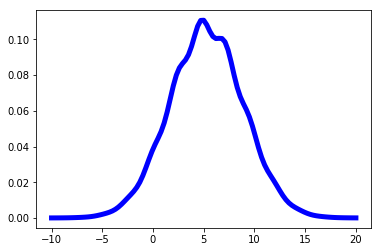

In [2]:
# Setup and plot expectation
Q = np.diag([5.1])
T = np.diag([0.9])

Bv = np.zeros((1,1))
Bv[0,0] = -0.2

Bh = np.zeros((1,1))
Bh[0,0] = 0.5

W = np.zeros((1,1))
W[0,0] = 2.05

X = np.linspace(-10,20, 101)
X = X.reshape((1,X.shape[0]))

P=rtbm_probability(X, Bv, Bh, T, W, Q)

plt.plot(X.flatten(), P[0],"b-", linewidth='5')

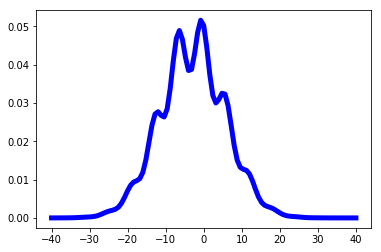

In [3]:
Q = np.diag([8,2.2])
T = np.diag([1.1])

Bv = np.zeros((1,1))
Bv[0,0] = -0.2

Bh = np.zeros((2,1))
Bh[0,0] = 0.5
Bh[1,0] = -0.5

W = np.zeros((1,2))
W[0,0] = 1.25
W[0,1] = 1.4

X = np.linspace(-40,40, 101)
X = X.reshape((1,X.shape[0]))

P=rtbm_probability(X, Bv, Bh, T, W, Q)

plt.plot(X.flatten(), P[0],"b-", linewidth='5')

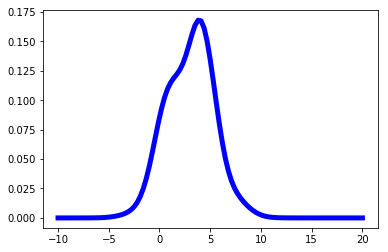

In [4]:
Q = np.diag([8,2.8])
T = np.diag([1.1])

Bv = np.zeros((1,1))
Bv[0,0] = -0.2

Bh = np.zeros((2,1))
Bh[0,0] = 0.5
Bh[1,0] = -0.5

W = np.zeros((1,2))
W[0,0] = 1.6
W[0,1] = -1.3

X = np.linspace(-10,20, 101)
X = X.reshape((1,X.shape[0]))

P=rtbm_probability(X, Bv, Bh, T, W, Q)

plt.plot(X.flatten(), P[0],"b-", linewidth='5')

# Phase II

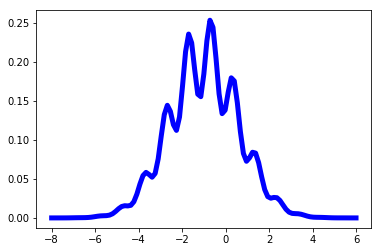

In [5]:
# WHERE IS A PROBLEM WITH THE NORMALIATION !

Q = np.diag([4.1])
T = np.diag([0.4])

Bv = np.zeros((1,1))
Bv[0,0] = 0.4

Bh = np.zeros((1,1), dtype=complex)
Bh[0,0] = 4j

W = np.zeros((1,1), dtype=complex)
W[0,0] = 6j

X = np.linspace(-8,6, 101)
X = X.reshape((1,X.shape[0]))

P=rtbm_probability(X, Bv, Bh, T, W, Q)

plt.plot(X.flatten(), np.real(P[0]),"b-", linewidth='5')

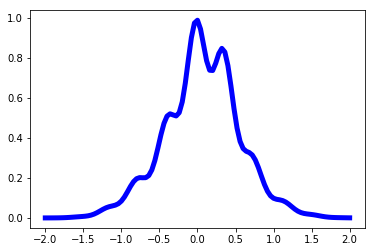

In [6]:
Q = np.diag([5,4.8])
T = np.diag([3.8])

Bv = np.zeros((1,1))
Bv[0,0] = -0.2

Bh = np.zeros((2,1), dtype=complex)
Bh[0,0] = 0.5j
Bh[1,0] = -0.7j

W = np.zeros((1,2), dtype=complex)
W[0,0] = 15.6j
W[0,1] = 4.3j

X = np.linspace(-2,2, 101)
X = X.reshape((1,X.shape[0]))

P=rtbm_probability(X, Bv, Bh, T, W, Q)

plt.plot(X.flatten(), np.real(P[0]),"b-", linewidth='5')

In [7]:
np.real(P[0])

array([  2.34612361e-04,   2.97319481e-04,   3.68636505e-04,
         4.64342574e-04,   6.18229237e-04,   8.82564489e-04,
         1.31841741e-03,   1.97388701e-03,   2.85573512e-03,
         3.91012006e-03,   5.03467697e-03,   6.13828717e-03,
         7.24178952e-03,   8.57875372e-03,   1.06282832e-02,
         1.40145730e-02,   1.92564496e-02,   2.64395064e-02,
         3.49769020e-02,   4.36569286e-02,   5.10860188e-02,
         5.64278802e-02,   6.01111289e-02,   6.40797639e-02,
         7.12941955e-02,   8.45287187e-02,   1.04906903e-01,
         1.30871925e-01,   1.58238680e-01,   1.81565685e-01,
         1.96450851e-01,   2.01808520e-01,   2.01053906e-01,
         2.01514128e-01,   2.12101750e-01,   2.39978859e-01,
         2.87361045e-01,   3.49697979e-01,   4.16218116e-01,
         4.73187203e-01,   5.09202855e-01,   5.20702689e-01,
         5.15189414e-01,   5.10066921e-01,   5.26575938e-01,
         5.80590100e-01,   6.73990760e-01,   7.90931083e-01,
         9.01837899e-01,